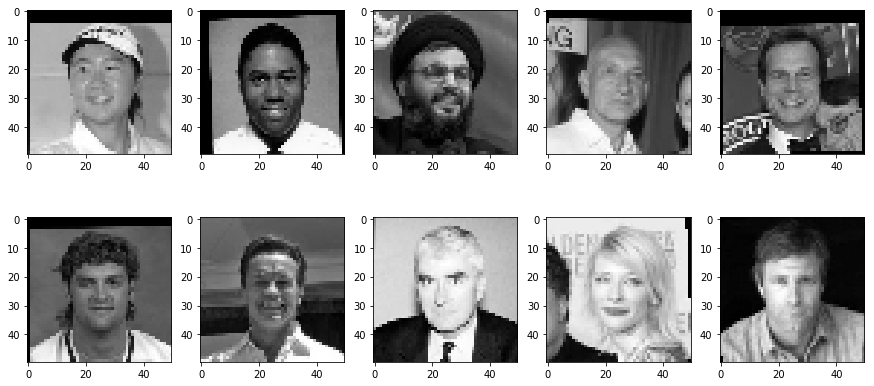

In [17]:
import glob

import cv2
from matplotlib import pyplot as plt
import numpy as np
from numpy import linalg as LA
from scipy.linalg import eigh

%matplotlib inline

shape = (50, 50)

images = np.array([cv2.resize(cv2.imread(file, cv2.IMREAD_GRAYSCALE), shape) for file in glob.glob("pca_images/*.jpg")])

fig, axes = plt.subplots(2, 5, figsize=(15, 7))

for img, ax in zip(images, axes.flatten()):
    ax.imshow(img, cmap=plt.cm.gray)

(10, 2500)


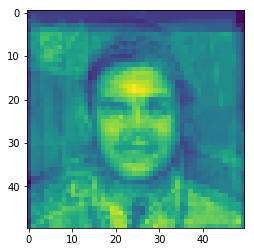

In [33]:
images_flat = images.reshape(10, shape[0]*shape[1])
print(images_flat.shape)
# fig, axes = plt.subplots(2, 5, figsize=(15, 7))

# for img, ax in zip(images_flat, axes.flatten()):
#     ax.plot(img)
    
# mean_img = sum(images_flat) / 10
mean_img = np.apply_along_axis(np.mean, axis=0, arr=images_flat)

plt.imshow(mean_img.reshape(50, 50))

def reduce_mean(img):
    return img - mean_img

images_flat_std = reduce_mean(images_flat)

# fig, axes = plt.subplots(2, 5, figsize=(15, 7))
# for img, ax in zip(images_flat_std, axes.flatten()):
#     ax.plot(img)

# del images_flat

In [25]:
images_flat_std

array([[ -57.8,  -62.7,  -63.1, ...,   55.4,   49. ,   80.8],
       [ -57.8,  -62.7,  -63.1, ...,  101.4,  106. , -103.2],
       [  43.2,   38.3,   37.9, ...,  -78.6,  -65. ,  -32.2],
       ...,
       [  87.2,  131.3,  134.9, ..., -101.6, -106. ,  -84.2],
       [ 150.2,  145.3,  144.9, ...,  -65.6,  -73. , -103.2],
       [ -57.8,  -62.7,  -63.1, ...,   25.4,   20. ,   -5.2]])

In [38]:
corr_matrix = np.cov(images_flat_std.T)

In [41]:
corr_matrix

array([[ 6273.06666667,  6747.82222222,  6786.57777778, ...,
        -2500.2       , -2498.55555556, -2039.06666667],
       [ 6747.82222222,  7462.67777778,  7521.03333333, ...,
        -3053.35555556, -3075.66666667, -2497.48888889],
       [ 6786.57777778,  7521.03333333,  7580.98888889, ...,
        -3098.51111111, -3122.77777778, -2534.91111111],
       ...,
       [-2500.2       , -3053.35555556, -3098.51111111, ...,
         8432.48888889,  8469.66666667,  6285.08888889],
       [-2498.55555556, -3075.66666667, -3122.77777778, ...,
         8469.66666667,  8574.66666667,  6320.22222222],
       [-2039.06666667, -2497.48888889, -2534.91111111, ...,
         6285.08888889,  6320.22222222, 10356.17777778]])

In [28]:
corr_matrix.shape

(2500, 2500)

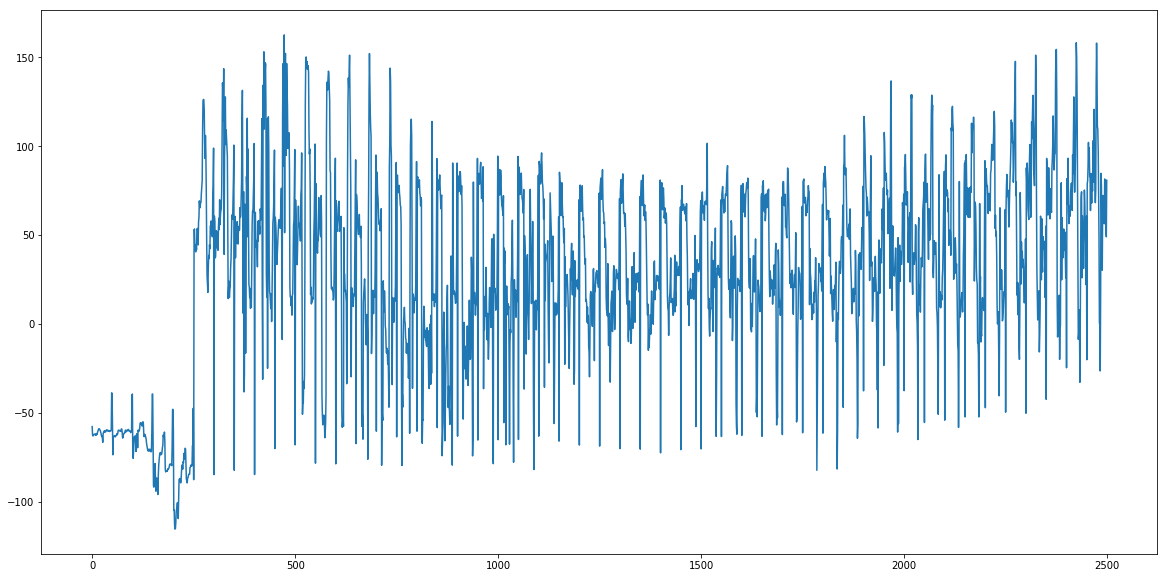

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(20, 10))
ax.plot(images_flat_std[0])

# del images_flat_std

In [42]:
# eig = LA.eig(corr_matrix)
eig = np.linalg.eig(corr_matrix)
eig

(array([ 5.08489190e+06+0.j,  1.90587003e+06+0.j,  1.42172600e+06+0.j, ...,
        -6.71665151e-13+0.j, -1.60264186e-13+0.j,  7.51262634e-13+0.j]),
 array([[ 2.83356731e-02+0.j,  2.12030533e-02+0.j, -1.15346633e-02+0.j,
         ..., -1.76680433e-04+0.j,  1.87709199e-05+0.j,
          4.36299749e-04+0.j],
        [ 3.32659712e-02+0.j,  2.30733183e-02+0.j, -1.07142735e-02+0.j,
         ...,  1.94811209e-04+0.j,  1.51664883e-04+0.j,
         -1.44845321e-04+0.j],
        [ 3.36684445e-02+0.j,  2.32259930e-02+0.j, -1.06473029e-02+0.j,
         ...,  1.33802255e-04+0.j, -3.72409118e-04+0.j,
          8.77506178e-05+0.j],
        ...,
        [-1.42033115e-02+0.j, -4.12540820e-02+0.j, -2.84603355e-02+0.j,
         ..., -7.71147357e-03+0.j, -3.40369169e-02+0.j,
          2.28047648e-02+0.j],
        [-1.52797374e-02+0.j, -3.85714351e-02+0.j, -3.31542355e-02+0.j,
         ...,  1.01697919e-02+0.j,  2.34748681e-03+0.j,
         -2.57624422e-02+0.j],
        [-1.24432669e-02+0.j, -2.31400974e-

In [43]:
eig[0].shape, eig[1].shape

((2500,), (2500, 2500))

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


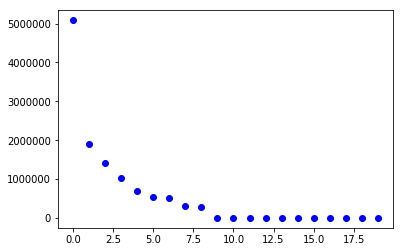

In [44]:
fig, ax = plt.subplots()
# ax.set_yscale('log')
plt.plot(eig[0][:20], 'bo')

In [11]:
# this is sorting by eigen value below but I think it is already sorted automatically by numpy
# eig_sorted = list(zip(*sorted(zip(*eig), reverse=True)))

In [45]:
eig[1][-1]

array([-0.01244327+0.j, -0.0231401 +0.j,  0.01160051+0.j, ...,
        0.00299893+0.j,  0.01024343+0.j, -0.01891358+0.j])

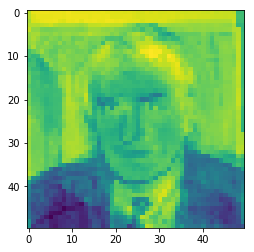

In [48]:
# plt.imshow(eig[1][-4].reshape(shape).astype(np.float))
reshaped = eig[1][:, 0].reshape(50, 50).real
reshaped /= (reshaped.max()/255.0)
plt.imshow(reshaped)

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:22: ComplexWarning: Casting complex values to real discards the imaginary part
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:30: ComplexWarning: Casting complex values to real discards the imaginary part


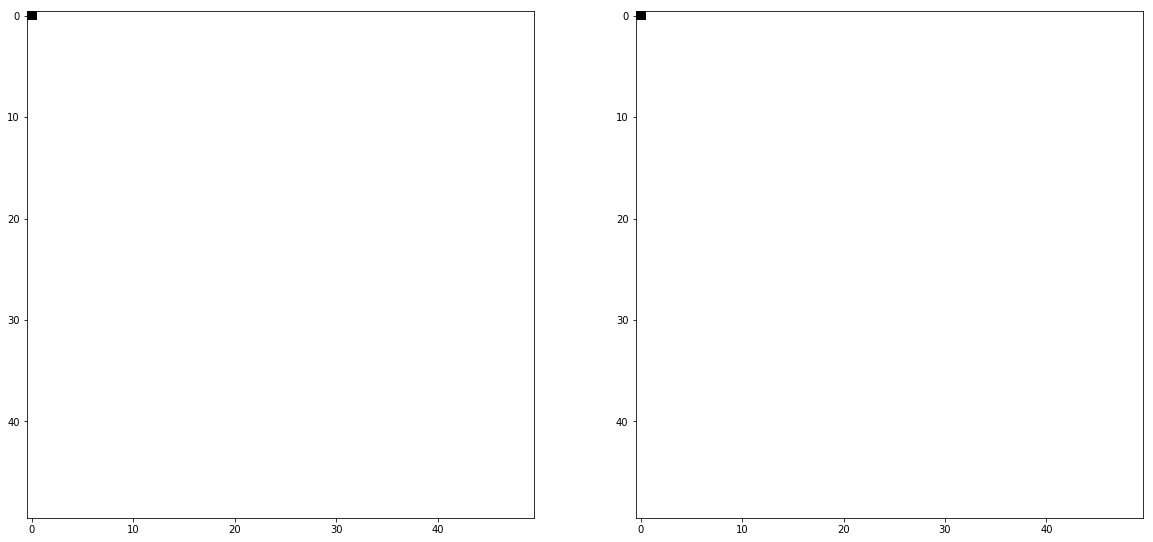

In [52]:
# sum(images_flat).reshape(shape)
# (eig[1].dot(images_flat_std[0]))
# .reshape(shape)

eig_vectors = eig[1]

w0 = eig_vectors[0].T.dot(images_flat_std[0])
# w1 = eig_vectors[1].T.dot(images_flat_std[0])
# w2 = eig_vectors[2].T.dot(images_flat_std[0])
# w3 = eig_vectors[3].T.dot(images_flat_std[0])
# w4 = eig_vectors[4].T.dot(images_flat_std[0])
# w5 = eig_vectors[5].T.dot(images_flat_std[0])
# w6 = eig_vectors[6].T.dot(images_flat_std[0])
# w7 = eig_vectors[7].T.dot(images_flat_std[0])
# w8 = eig_vectors[8].T.dot(images_flat_std[0])
# w9 = eig_vectors[9].T.dot(images_flat_std[0])

fix, ax = plt.subplots(1, 2, figsize=(20, 10))

new_image = mean_img + w0 * eig_vectors[0]

ax[0].imshow(new_image.reshape(shape).astype(np.float), cmap=plt.cm.gray)

new_image = mean_img + w0 * eig_vectors[0] + w1 * eig_vectors[1]# + \
#                        w2 * eig_vectors[2] + w3 * eig_vectors[3] + \
#                        w4 * eig_vectors[4] + w5 * eig_vectors[5] + \
#                        w6 * eig_vectors[6] + w7 * eig_vectors[7] + \
#                        w8 * eig_vectors[8] + w9 * eig_vectors[9]

ax[1].imshow(10*new_image.reshape(shape).astype(np.float), cmap=plt.cm.gray)

In [15]:
w1, w2, w3, w4, w5, w6, w7, w8, w9

(60.424090271039105,
 -133.7074032046156,
 -148.57810180815545,
 54.228623197994736,
 -61.49313606767511,
 -64.4870541084468,
 129.84846645922931,
 -317.44760289617614,
 80.53209010252766)